In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/satellite-images-of-hurricane-damage/train_another/damage/-95.656807_29.835212.jpeg
/kaggle/input/satellite-images-of-hurricane-damage/train_another/damage/-95.630673_29.775671999999997.jpeg
/kaggle/input/satellite-images-of-hurricane-damage/train_another/damage/-95.639432_29.844975.jpeg
/kaggle/input/satellite-images-of-hurricane-damage/train_another/damage/-95.586533_29.757163000000002.jpeg
/kaggle/input/satellite-images-of-hurricane-damage/train_another/damage/-95.270494_29.60561.jpeg
/kaggle/input/satellite-images-of-hurricane-damage/train_another/damage/-93.975202_29.901428999999997.jpeg
/kaggle/input/satellite-images-of-hurricane-damage/train_another/damage/-97.001147_28.868156.jpeg
/kaggle/input/satellite-images-of-hurricane-damage/train_another/damage/-96.879051_28.499761.jpeg
/kaggle/input/satellite-images-of-hurricane-damage/train_another/damage/-96.97715600000001_28.500991.jpeg
/kaggle/input/satellite-images-of-hurricane-damage/train_another/damage/-95.138549_2

In [2]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib

In [3]:
from PIL import Image
def loadimg(path,x,y):
    imgs=[]
    label=[]
    l1=os.listdir(path)
    for i in l1:
        l2=os.listdir(path+"/"+i)
        for j in l2:
            img=Image.open(path+i+"/"+j)
            img=img.resize(size=(x,y))
            img=img.convert("L")
            img=np.array(img,dtype=np.float16)/255
            img=img.reshape(img.shape[0],img.shape[1],1)
            imgs.append(np.array(img))
            label.append(i)
            del img
    return np.array(imgs),label

In [4]:
train_x,train_y=loadimg('/kaggle/input/satellite-images-of-hurricane-damage/train_another/',28,28)

In [5]:
train_x.shape

(10000, 28, 28, 1)

In [6]:
train_y=pd.Series(train_y,dtype='category').cat.codes
train_y.shape

(10000,)

In [7]:
test_x,test_y=loadimg('/kaggle/input/satellite-images-of-hurricane-damage/test/',28,28)

In [8]:
test_x.shape

(2000, 28, 28, 1)

In [9]:
test_y=pd.Series(test_y,dtype='category').cat.codes
test_y.shape

(2000,)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D , Flatten
import numpy as np

In [11]:
train_x = train_x.reshape(-1, 28, 28, 1)
model = Sequential()
model.add(Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'relu',
input_shape = (28,28,1), padding = 'same'))
model.add(MaxPooling2D(pool_size = 2, strides = 2, padding = 'valid'))
model.add(Conv2D(filters = 16, kernel_size = 5, strides = 1,activation = 'relu',
padding = 'valid'))
model.add(MaxPooling2D(pool_size = 2, strides = 2, padding = 'valid'))
model.add(Conv2D(filters = 120, kernel_size = 5, strides = 1,activation = 'relu',
padding = 'valid'))
model.add(Flatten())
model.add(Dense(units = 84, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 120)               0         
_________________________________________________________________
dense (Dense)                (None, 84)                1

In [12]:
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [13]:
epoch=25
history=model.fit(train_x, train_y,validation_data=(test_x, test_y),epochs=epoch)

Epoch 1/25
313/313 [==============================] - 11s 5ms/step - loss: 0.5309 - accuracy: 0.7439 - val_loss: 0.4335 - val_accuracy: 0.8210
Epoch 2/25
313/313 [==============================] - 1s 4ms/step - loss: 0.4148 - accuracy: 0.8229 - val_loss: 0.4106 - val_accuracy: 0.8195
Epoch 3/25
313/313 [==============================] - 1s 4ms/step - loss: 0.3834 - accuracy: 0.8386 - val_loss: 0.3916 - val_accuracy: 0.8245
Epoch 4/25
313/313 [==============================] - 1s 4ms/step - loss: 0.3495 - accuracy: 0.8549 - val_loss: 0.3595 - val_accuracy: 0.8420
Epoch 5/25
313/313 [==============================] - 1s 4ms/step - loss: 0.3155 - accuracy: 0.8706 - val_loss: 0.3233 - val_accuracy: 0.8655
Epoch 6/25
313/313 [==============================] - 1s 4ms/step - loss: 0.2929 - accuracy: 0.8745 - val_loss: 0.2972 - val_accuracy: 0.8740
Epoch 7/25
313/313 [==============================] - 1s 4ms/step - loss: 0.2699 - accuracy: 0.8853 - val_loss: 0.3002 - val_accuracy: 0.8720
Epoch

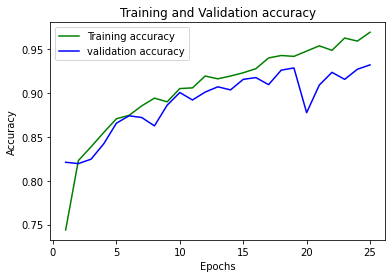

In [14]:
train = history.history['accuracy']
val = history.history['val_accuracy']
epochs = range(1,epoch+1)
plt.plot(epochs, train, 'g', label='Training accuracy')
plt.plot(epochs, val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

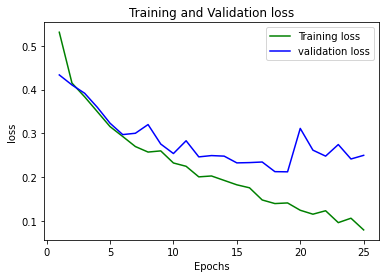

In [15]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,epoch+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
model.evaluate(train_x,train_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.0547 - accuracy: 0.9809


[0.054655175656080246, 0.98089998960495]

In [17]:
model.evaluate(test_x,test_y)

63/63 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.9320


[0.2498452216386795, 0.9319999814033508]

In [18]:
def newImage(path,x,y):
    imgs=[]
    img=Image.open(path)
    img=img.convert('L')
    img=img.resize(size=(x,y))
    img=np.array(img,dtype=np.float16)/255
    img=img.reshape(img.shape[0],img.shape[1],1)
    imgs.append(np.array(img))
    return np.array(imgs)

In [19]:
labels=['Not Damaged','Damaged']

'Damaged'

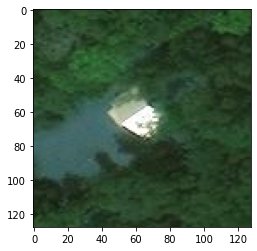

In [20]:
import cv2
def predict(path):
    image=cv2.imread(path)
    plt.imshow(image)
    x_new=newImage(path,28,28)
    y_pred=model.predict(x_new)
    y_pred = np.where(y_pred > 0.5,0,1)
    return labels[y_pred[0][0]]
predict('/kaggle/input/satellite-images-of-hurricane-damage/test/damage/-93.618483_30.730039.jpeg')


In [21]:
model.save('model.h5')